In [32]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft
#from scipy.fft import fft, ifft

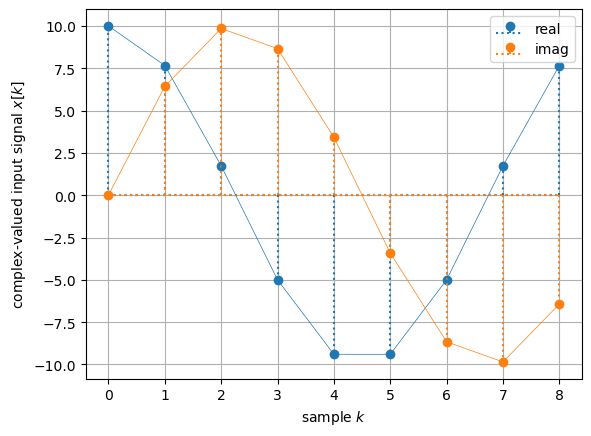

In [47]:
N = 9  # signal block length
k = np.arange(N)  # all required sample/time indices
A = 10  # signal amplitude

tmpmu = 2-1/2  # DFT eigenfrequency worst case
tmpmu = 1  # DFT eigenfrequency best case

x = A * np.exp(tmpmu * +1j*2*np.pi/N * k)

# plot
plt.stem(k, np.real(x), markerfmt='C0o',
         basefmt='C0:', linefmt='C0:', label='real')
plt.stem(k, np.imag(x), markerfmt='C1o',
         basefmt='C1:', linefmt='C1:', label='imag')
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience:
plt.plot(k, np.real(x), 'C0-', lw=0.5)
plt.plot(k, np.imag(x), 'C1-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'complex-valued input signal $x[k]$')
plt.legend()
plt.grid(True)

In [48]:
# DFT with for-loop:
X_ = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
for mu_ in range(N):  # do for all DFT frequency indices
    for k_ in range(N):  # do for all sample indices
        X_[mu_] += x[k_] * np.exp(-1j*2*np.pi/N*k_*mu_)

In [49]:
# IDFT with for-loop:
x_ = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
for k_ in range(N):
    for mu_ in range(N):
        x_[k_] += X_[mu_] * np.exp(+1j*2*np.pi/N*k_*mu_)
x_ *= 1/N  # normalization in the IDFT stage

In [50]:
# k = np.arange(N)  # all required sample/time indices, already defined above

# all required DFT frequency indices, actually same entries like in k
mu = np.arange(N)

# set up matrices
K = np.outer(k, mu)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix for DFT

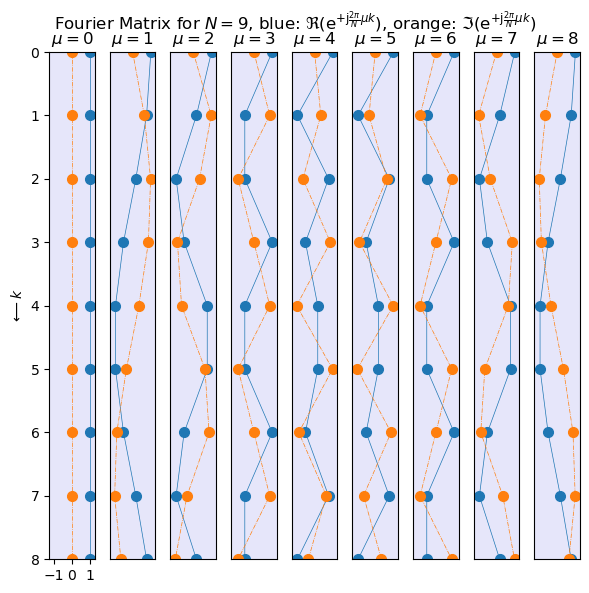

In [51]:
# visualize the content of the Fourier matrix
# we've already set up (use other N if desired):
# N = 8
# k = np.arange(N)
# mu = np.arange(N)
# W = np.exp(+1j*2*np.pi/N*np.outer(k, mu))  # set up Fourier matrix

fig, ax = plt.subplots(1, N)
fig.set_size_inches(6, 6)
fig.suptitle(
    r'Fourier Matrix for $N=$%d, blue: $\Re(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$, orange: $\Im(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$' % N)

for tmp in range(N):
    ax[tmp].set_facecolor('lavender')
    ax[tmp].plot(W[:, tmp].real, k, 'C0o-', ms=7, lw=0.5)
    ax[tmp].plot(W[:, tmp].imag, k, 'C1o-.', ms=7, lw=0.5)
    ax[tmp].set_ylim(N-1, 0)
    ax[tmp].set_xlim(-5/4, +5/4)
    if tmp == 0:
        ax[tmp].set_yticks(np.arange(0, N))
        ax[tmp].set_xticks(np.arange(-1, 1+1, 1))
        ax[tmp].set_ylabel(r'$\longleftarrow k$')
    else:
        ax[tmp].set_yticks([], minor=False)
        ax[tmp].set_xticks([], minor=False)
    ax[tmp].set_title(r'$\mu=$%d' % tmp)
fig.tight_layout()
fig.subplots_adjust(top=0.91)

fig.savefig('fourier_matrix.png', dpi=300)

# TBD: row version for analysis

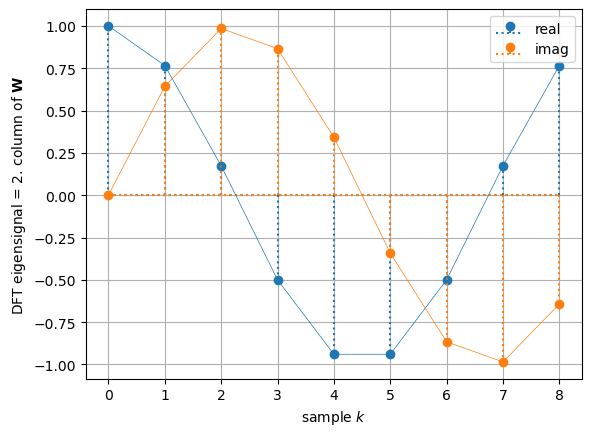

In [52]:
tmpmu = 1  # column index

plt.stem(k, np.real(W[:, tmpmu]), label='real',
         markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(W[:, tmpmu]), label='imag',
         markerfmt='C1o', basefmt='C1:', linefmt='C1:')
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience
plt.plot(k, np.real(W[:, tmpmu]), 'C0-', lw=0.5)
plt.plot(k, np.imag(W[:, tmpmu]), 'C1-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'DFT eigensignal = '+str(tmpmu+1)+'. column of $\mathbf{W}$')
plt.legend()
plt.grid(True)

In [53]:
np.dot(np.conj(W[:, 0]), W[:, 0])  # same eigensignal, same eigenfrequency
# np.vdot(W[:,0],W[:,0])  # this is the suitable numpy function

(9+0j)

In [54]:
np.dot(np.conj(W[:, 0]), W[:, 1])  # different eigensignals
# np.vdot(W[:,0],W[:,1])  # this is the suitable numpy function
# result should be zero, with numerical precision close to zero:

(-7.771561172376096e-16+1.1102230246251565e-16j)

True
DC is 1 as expected:  (0.6666666666666663+1.603655480014115e-16j)


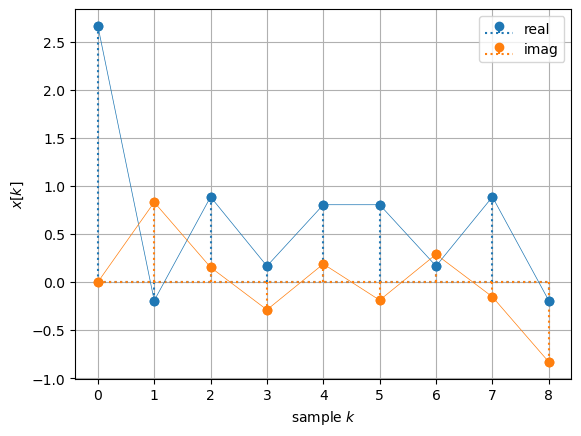

In [55]:
if N == 9:
    X_test = np.array([6,2,4,3,4,5,0,0,0])
    # x_test = 1/N*W@X_test  # >= Python3.5
    x_test = 1/N * np.matmul(W, X_test)

    plt.stem(k, np.real(x_test), label='real',
             markerfmt='C0o', basefmt='C0:', linefmt='C0:')
    plt.stem(k, np.imag(x_test), label='imag',
             markerfmt='C1o', basefmt='C1:', linefmt='C1:')    
    # note that connecting the samples by lines is actually wrong, we
    # use it anyway for more visual convenience
    plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
    plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)
    plt.xlabel(r'sample $k$')
    plt.ylabel(r'$x[k]$')
    plt.legend()
    plt.grid(True)

    # check if results are identical with numpy ifft package
    print(np.allclose(ifft(X_test), x_test))
    print('DC is 1 as expected: ', np.mean(x_test))

In [56]:
if N == 9:
    x_test2 = X_test[0] * W[:, 0] + X_test[1] * W[:, 1] + X_test[2] * W[:, 2]

In [57]:
if N == 9:
    print(np.allclose(fft(x_test), X_test))

True


In [58]:
if N == 9:
    print(np.conj(W[:, 0])@x_test)
    print(np.conj(W[:, 1])@x_test)
    print(np.conj(W[:, 2])@x_test)

(5.999999999999997+1.4710455076283324e-15j)
(2-4.440892098500626e-16j)
(3.9999999999999973+9.43689570931383e-16j)


In [59]:
X = fft(x)
# print(np.allclose(np.conj(W)@x, X))  # >=Python 3.5
print(np.allclose(np.matmul(np.conj(W), x), X))

True


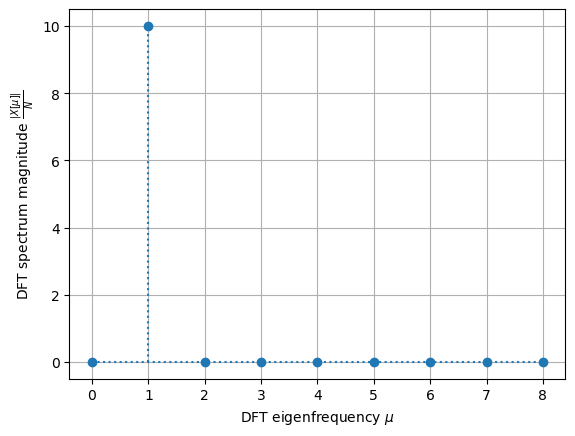

In [60]:
plt.stem(mu, np.abs(X)/N, markerfmt='C0o', basefmt='C0:', linefmt='C0:')
# plt.plot(mu, np.abs(X)/N, 'C0', lw=1)  # this is here a misleading plot and hence not used
plt.xlabel(r'DFT eigenfrequency $\mu$')
plt.ylabel(r'DFT spectrum magnitude $\frac{|X[\mu]|}{N}$')
plt.grid(True)